In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import numpy.matlib

In [3]:
sp = pd.read_csv("SP_2010__baby.csv")

In [4]:
sp_dim = sp.shape
print("\n Input data has "+ str(sp_dim[0])+" observations and "+ str(sp_dim[1]) +" variables.")


 Input data has 436 observations and 11 variables.


In [5]:
sp.describe()

,Price,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales
count,436.000000,436.000000,436.000000,436.000000,436.00000,436.000000,436.000000,436.000000
mean,79.915917,2.992156,24.440940,60.108784,90.88695,38.155665,3.641059,3.025894
std,87.183569,5.421650,22.752006,64.021437,99.13587,59.406136,6.539440,2.846238
min,4.970000,-32.820000,-19.190000,3.520000,5.85000,2.820000,-1.440000,0.220000
25%,39.120000,1.387500,10.140000,29.827500,46.44750,10.582500,0.927343,1.217500
50%,64.105000,2.770000,19.095000,47.290000,73.72000,18.235000,1.605000,2.190000
75%,96.732500,4.652500,33.880000,74.707500,106.71500,35.452500,3.642500,3.532500
max,1329.460000,50.810000,182.370000,954.020000,1476.52000,529.560000,78.500000,17.630000


In [6]:
sp.set_index(sp['Name'],inplace=True)

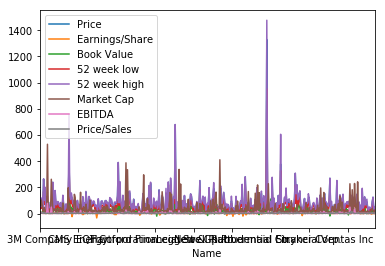

In [7]:
sp.plot()
plt.show()

In [8]:
sp_mean = np.mean(sp,0)
sp_mean_mat = np.matlib.repmat(sp_mean,sp_dim[0],1)
print(sp_mean_mat)

[[ 79.91591743   2.99215596  24.44094037 ...,  38.15566514   3.64105888
    3.0258945 ]
 [ 79.91591743   2.99215596  24.44094037 ...,  38.15566514   3.64105888
    3.0258945 ]
 [ 79.91591743   2.99215596  24.44094037 ...,  38.15566514   3.64105888
    3.0258945 ]
 ..., 
 [ 79.91591743   2.99215596  24.44094037 ...,  38.15566514   3.64105888
    3.0258945 ]
 [ 79.91591743   2.99215596  24.44094037 ...,  38.15566514   3.64105888
    3.0258945 ]
 [ 79.91591743   2.99215596  24.44094037 ...,  38.15566514   3.64105888
    3.0258945 ]]


In [9]:
sp.drop(sp.columns[[0, 1,2]], axis=1, inplace=True)

In [10]:
k = (sp - sp_mean_mat)/sp.std()
print(k)

                                 Price  Earnings/Share  Book Value  \
Name                                                                 
3M Company                    1.114936        0.883097   -0.224197   
Abbott Laboratories          -0.436159       -0.253088   -0.454507   
AbbVie                       -0.180721        0.062314   -0.948090   
Accenture plc                 0.403678        0.540028   -0.570980   
Activision Blizzard          -0.443041       -0.347156   -0.577133   
Acuity Brands Inc             2.118565        0.576917    0.530022   
Adobe Systems Inc             0.193547       -0.225421   -0.435607   
Advance Auto Parts            0.974198        0.628562    0.500134   
AES Corp                     -0.775329       -0.472579   -0.860625   
Aetna Inc                     0.425356        0.672829    1.033714   
Apple Inc.                    0.192285        1.104432   -0.027731   
Applied Materials Inc        -0.630691       -0.352689   -0.809201   
Archer-Daniels-Midla

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
pca.fit(k)
print(pca.components_)

[[  4.99993190e-01   3.48795839e-01   3.21854584e-01   5.04604469e-01
    4.97034326e-01   5.42506676e-02   1.94222977e-02   1.40601381e-01]
 [ -3.25030645e-02   6.74905203e-02  -6.75376623e-02  -2.83802653e-02
   -4.35699190e-02   6.98830408e-01   7.06177272e-01  -8.55498626e-03]
 [  7.82176603e-02  -3.73915968e-01  -2.79689456e-01   5.40739722e-02
    5.58937831e-02   1.07004071e-01  -7.71741453e-02   8.67403496e-01]
 [ -1.15821459e-01  -3.90532809e-01   8.82708798e-01  -1.15279898e-01
   -1.11968790e-01   1.14170368e-01  -6.57806085e-03   1.26451904e-01]
 [ -2.45978235e-01   7.61294561e-01   1.74375999e-01  -2.22056912e-01
   -2.92970979e-01   1.44914322e-02  -1.03554661e-01   4.28303016e-01]
 [  1.81850864e-02   9.91506710e-03  -6.28036591e-02   1.22828736e-02
    1.23038630e-03   6.95489534e-01  -6.95814370e-01  -1.66165528e-01]
 [ -6.79965021e-01   2.46083808e-02  -8.77118654e-04  -6.94141650e-02
    7.28842189e-01   1.62557070e-02  -7.32111723e-03   2.63461508e-02]
 [  4.5412479

In [13]:
print(pca.explained_variance_)

[ 3.7575554   1.81953596  1.0910765   0.64371348  0.48968794  0.16405003
  0.0258893   0.00849141]


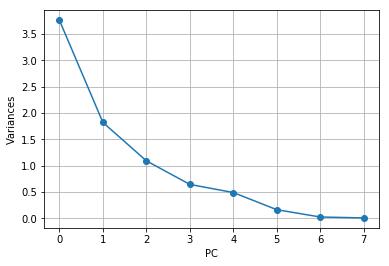

In [14]:
ax = plt.plot(pca.explained_variance_, marker='o')

plt.xlabel("PC")
plt.ylabel("Variances")
plt.grid(True)
plt.show()

In [15]:
components = pca.components_.T

In [16]:
print(components)

[[  4.99993190e-01  -3.25030645e-02   7.82176603e-02  -1.15821459e-01
   -2.45978235e-01   1.81850864e-02  -6.79965021e-01   4.54124795e-01]
 [  3.48795839e-01   6.74905203e-02  -3.73915968e-01  -3.90532809e-01
    7.61294561e-01   9.91506710e-03   2.46083808e-02   3.44118667e-02]
 [  3.21854584e-01  -6.75376623e-02  -2.79689456e-01   8.82708798e-01
    1.74375999e-01  -6.28036591e-02  -8.77118654e-04   9.75805562e-03]
 [  5.04604469e-01  -2.83802653e-02   5.40739722e-02  -1.15279898e-01
   -2.22056912e-01   1.22828736e-02  -6.94141650e-02  -8.21021908e-01]
 [  4.97034326e-01  -4.35699190e-02   5.58937831e-02  -1.11968790e-01
   -2.92970979e-01   1.23038630e-03   7.28842189e-01   3.44024667e-01]
 [  5.42506676e-02   6.98830408e-01   1.07004071e-01   1.14170368e-01
    1.44914322e-02   6.95489534e-01   1.62557070e-02   5.31415137e-03]
 [  1.94222977e-02   7.06177272e-01  -7.71741453e-02  -6.57806085e-03
   -1.03554661e-01  -6.95814370e-01  -7.32111723e-03   1.58449242e-03]
 [  1.4060138

In [16]:
newdata1 = pca.transform(k)
print(newdata1)

[[ 1.91373106  1.31324905  0.14830782 ...,  0.31608766 -0.15938575
  -0.1031473 ]
 [-0.81758651  0.41286216  0.16438235 ...,  0.20868741  0.03420095
  -0.03570238]
 [-0.44287669  1.57616948  0.6354184  ...,  0.03849771  0.02173181
   0.04185714]
 ..., 
 [ 0.83806348 -0.41490169  0.12537071 ..., -0.13675871 -0.14057384
  -0.01496948]
 [-0.98875444 -0.76482508 -0.29696898 ..., -0.01335636  0.0255193
   0.01603107]
 [-0.94225259 -0.32207947  0.92627284 ..., -0.00414753 -0.021871
  -0.03895761]]


In [17]:
print(pca.explained_variance_ratio_)

[ 0.46969442  0.227442    0.13638456  0.08046418  0.06121099  0.02050625
  0.00323616  0.00106143]


In [18]:
curatio = np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)
print(curatio)

[ 0.46969442  0.69713642  0.83352098  0.91398517  0.97519616  0.99570241
  0.99893857  1.        ]


In [19]:
n = 4
reduced_data = newdata1[:n]
d_dim=reduced_data.shape
print(d_dim)

(4, 8)


In [20]:
a = newdata1[:,:4]
print(a)

[[ 1.91373106  1.31324905  0.14830782 -0.75298768]
 [-0.81758651  0.41286216  0.16438235 -0.12207639]
 [-0.44287669  1.57616948  0.6354184  -0.6156591 ]
 ..., 
 [ 0.83806348 -0.41490169  0.12537071  0.97179578]
 [-0.98875444 -0.76482508 -0.29696898  0.59557588]
 [-0.94225259 -0.32207947  0.92627284 -0.5101887 ]]


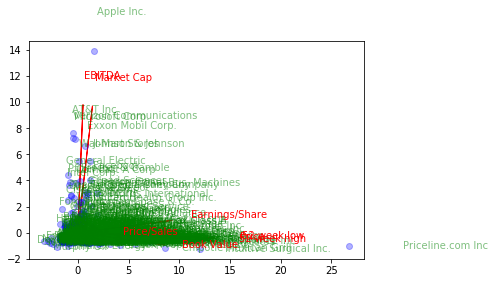

In [21]:
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(k)[:,0] 
ys = pca.transform(k)[:,1]


## visualize projections

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo',alpha=0.3)
    plt.text(xs[i]*1.2, ys[i]*1.2, list(k.index)[i], color='g',alpha=0.5)

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(k.columns.values)[i], color='r')

plt.show()

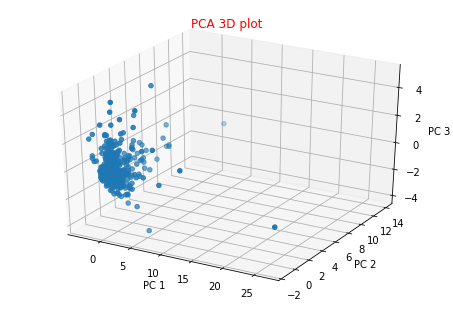

In [22]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

label =k.columns.values

pca = PCA(n_components=3)
pca.fit(k)
newdata1 = pca.transform(k)

plt.clf()
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(newdata1[:,0],newdata1[:,1],newdata1[:,2], cmap= cm.coolwarm)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PCA 3D plot', color='r')
plt.show()

In [24]:
df = pd.DataFrame(a, index=sp.index, columns=['PC1','PC2','PC3','PC4'])

In [25]:
print(df)

                                   PC1        PC2       PC3       PC4
Name                                                                 
3M Company                    1.913731   1.313249  0.148308 -0.752988
Abbott Laboratories          -0.817587   0.412862  0.164382 -0.122076
AbbVie                       -0.442877   1.576169  0.635418 -0.615659
Accenture plc                 0.573119   0.625004 -0.191361 -0.821846
Activision Blizzard          -0.919436  -0.253480  1.163673 -0.075068
Acuity Brands Inc             3.148858  -0.840477  0.133650 -0.420148
Adobe Systems Inc             0.308999  -0.128487  2.078504 -0.066128
Advance Auto Parts            1.863842  -0.663572 -0.745070 -0.298077
AES Corp                     -1.777007  -0.245063 -0.538560 -0.472002
Aetna Inc                     1.099580   0.162967 -1.194209  0.402269
Apple Inc.                    1.550574  13.905314 -0.558118  0.258838
Applied Materials Inc        -1.418363  -0.207424  0.154766 -0.377329
Archer-Daniels-Midla

In [36]:
#find the top 20 stocks with largest PC1 values
a1 = df.nlargest(20,'PC1')
a1.drop(a1.columns[[1,2,3]], axis=1, inplace=True)
print(a1)

                                 PC1
Name                                
Priceline.com Inc          26.679119
Intuitive Surgical Inc.    12.079441
Chipotle Mexican Grill      8.571340
Regeneron                   7.068450
Equinix                     5.590963
Mohawk Industries           5.521334
Intercontinental Exchange   5.422021
Essex Property Trust Inc    4.117385
Goldman Sachs Group         4.090275
Public Storage              4.019150
Sherwin-Williams            3.943448
O'Reilly Automotive         3.768844
Acuity Brands Inc           3.148858
Grainger (W.W.) Inc.        3.144230
Lockheed Martin Corp.       3.065146
Simon Property Group Inc    2.871335
TransDigm Group             2.753396
Northrop Grumman Corp.      2.750947
McKesson Corp.              2.590612
Humana Inc.                 2.485572


In [38]:
#find the top 20 stocks with largest PC2 values
a2 = df.nlargest(20,'PC2')
a2.drop(a2.columns[[0,2,3]], axis=1, inplace=True)
print(a2)

                                   PC2
Name                                  
Apple Inc.                   13.905314
AT&T Inc                      7.673819
Verizon Communications        7.253754
Microsoft Corp.               7.194483
Exxon Mobil Corp.             6.661341
Johnson & Johnson             5.514875
Wal-Mart Stores               5.491610
General Electric              4.381443
Facebook                      4.053852
Procter & Gamble              3.923302
Pfizer Inc.                   3.918523
Comcast A Corp                3.839504
Intel Corp.                   3.620484
Gilead Sciences               3.113772
Chevron Corp.                 3.033529
International Bus. Machines   3.021627
The Walt Disney Company       2.858437
The Coca Cola Company         2.852287
Oracle Corp.                  2.803072
Merck & Co.                   2.691384


In [39]:
#find the top 20 stocks with largest PCk values
#k =4
*a3 = df.nlargest(20,'PC4')
a3.drop(a3.columns[[0,1,2]], axis=1, inplace=True)
print(a3)

                                PC4
Name                               
Goldman Sachs Group        4.987559
Intercontinental Exchange  2.810496
Hess Corporation           2.794701
Prudential Financial       2.693062
Chevron Corp.              2.480595
Chubb Limited              2.437559
Essex Property Trust Inc   2.383644
M&T Bank Corp.             2.266725
Capital One Financial      2.265844
Devon Energy Corp.         2.180474
Cimarex Energy             2.061792
PNC Financial Services     1.930454
Citigroup Inc.             1.923347
Willis Towers Watson       1.855626
SL Green Realty            1.794051
Perrigo                    1.785283
Concho Resources           1.773281
Pioneer Natural Resources  1.703481
MetLife Inc.               1.641094
JPMorgan Chase & Co.       1.627491


In [40]:
df['score'] = np.sqrt(df['PC1']**2 + df['PC2']**2 + df['PC3']**2 + df['PC4']**2)
print(df)

                                   PC1        PC2       PC3       PC4  \
Name                                                                    
3M Company                    1.913731   1.313249  0.148308 -0.752988   
Abbott Laboratories          -0.817587   0.412862  0.164382 -0.122076   
AbbVie                       -0.442877   1.576169  0.635418 -0.615659   
Accenture plc                 0.573119   0.625004 -0.191361 -0.821846   
Activision Blizzard          -0.919436  -0.253480  1.163673 -0.075068   
Acuity Brands Inc             3.148858  -0.840477  0.133650 -0.420148   
Adobe Systems Inc             0.308999  -0.128487  2.078504 -0.066128   
Advance Auto Parts            1.863842  -0.663572 -0.745070 -0.298077   
AES Corp                     -1.777007  -0.245063 -0.538560 -0.472002   
Aetna Inc                     1.099580   0.162967 -1.194209  0.402269   
Apple Inc.                    1.550574  13.905314 -0.558118  0.258838   
Applied Materials Inc        -1.418363  -0.207424  

In [41]:
#find the top 20 stocks with largest score values
a4 = df.nlargest(20,'score')
a4.drop(a4.columns[[0,1,2,3]], axis=1, inplace=True)
print(a4)

                                score
Name                                 
Priceline.com Inc           26.805013
Apple Inc.                  14.005018
Intuitive Surgical Inc.     12.264442
Chipotle Mexican Grill       8.746220
AT&T Inc                     7.717476
Regeneron                    7.495627
Verizon Communications       7.301487
Microsoft Corp.              7.297508
Mohawk Industries            7.145055
Goldman Sachs Group          6.835879
Exxon Mobil Corp.            6.813602
Facebook                     6.536992
Intercontinental Exchange    6.144262
Public Storage               6.104067
Equinix                      6.100360
Johnson & Johnson            5.702941
Wal-Mart Stores              5.567250
Essex Property Trust Inc     5.309462
Vertex Pharmaceuticals Inc   5.045041
Devon Energy Corp.           4.526737
